In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk import FreqDist, pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
#reading in the data I created in the better pushshift practice notebook
stoic = pd.read_csv('../datasets/stoicism.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/stoicism.csv'

In [7]:
stoic.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,poll_data,distinguished,edited,banned_by,author_cakeday,gallery_data,is_gallery,datetime,merged,label
0,[],False,qilaube,NaN,[],NaN,text,t2_2ffk7jx9,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27 20:31:37,Can an emotional person practice Stoic philoso...,stoic
1,[],False,Nochickens4u,NaN,[],NaN,text,t2_pe0grfk,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27 20:23:13,I’ve recently been wanting to get into stoicis...,stoic
2,[],False,SecretChaosFolder,NaN,[],NaN,text,t2_69rtos71,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27 20:13:39,If you feeling that you stuck in your practice...,stoic
3,[],False,neocamel,NaN,[],NaN,text,t2_3g3im,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27 20:02:36,Stoicism and noisy neighbors? My upstairs neig...,stoic
4,[],False,chillin_mcmillin,NaN,[],NaN,text,t2_1heabci3,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27 19:08:14,"Just listened to ""You always hurt the One you ...",stoic


In [8]:
stoic.shape

(3000, 84)

In [9]:
# reading in zen dataframe 

zen = pd.read_csv('../datasets/zen.csv')

In [10]:
zen.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,og_description,og_title,gilded,rte_mode,author_id,brand_safe,previous_visits,datetime,label,merged
0,[],False,Affectionate_Ranger,NaN,[],NaN,text,t2_1c7iyv1j,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27 17:58:37,zen,You need to fight your mind every time it trie...
1,[],False,Lightfiend,NaN,[],NaN,text,t2_39j8l,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27 13:47:28,zen,A phone call creates stronger bonds than text-...
2,[],False,Affectionate_Ranger,NaN,[],NaN,text,t2_1c7iyv1j,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-26 19:04:39,zen,"Everything in your life every experience, ever..."
3,[],False,BladeV-Cash,NaN,[],NaN,text,t2_62adtmzy,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-26 17:22:36,zen,The Parable of the Mexican Fisherman got me re...
4,[],False,Affectionate_Ranger,NaN,[],NaN,text,t2_1c7iyv1j,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24 18:21:44,zen,The key to success and productivity isn’t to t...


In [14]:
# only keeping important rows 
stoic = stoic[['label', 'merged']]
zen = zen[['label', 'merged']]

In [12]:
zen.head()

,label,merged
0,zen,You need to fight your mind every time it trie...
1,zen,A phone call creates stronger bonds than text-...
2,zen,"Everything in your life every experience, ever..."
3,zen,The Parable of the Mexican Fisherman got me re...
4,zen,The key to success and productivity isn’t to t...


In [13]:
zen.shape

(2997, 2)

In [216]:
stoic.head()

,label,merged
0,stoic,Can an emotional person practice Stoic philoso...
1,stoic,I’ve recently been wanting to get into stoicis...
2,stoic,If you feeling that you stuck in your practice...
3,stoic,Stoicism and noisy neighbors? My upstairs neig...
4,stoic,"Just listened to ""You always hurt the One you ..."


In [16]:
stoic.shape

(3000, 2)

In [17]:
stoic_zen = pd.concat([zen, stoic])

In [50]:
stoic_zen.head()

,label,merged
0,zen,You need to fight your mind every time it trie...
1,zen,A phone call creates stronger bonds than text-...
2,zen,"Everything in your life every experience, ever..."
3,zen,The Parable of the Mexican Fisherman got me re...
4,zen,The key to success and productivity isn’t to t...


In [19]:
stoic_zen.shape

(5997, 2)

In [215]:
# filling null values 
stoic_zen[stoic_zen['merged'].isnull()]

,label,merged


In [40]:
stoic_zen = stoic_zen[stoic_zen['merged'].notna()]

In [219]:
stoic_zen[stoic_zen['merged'].isnull()]

,label,merged


In [49]:
# resetting index on original stoic_zen df 
stoic_zen.reset_index(drop=True, inplace=True)

**Storing my combined stoic_zen dataframe with null values removed and index reset as csv so that it can be used in other modeles/other notebooks.**

In [221]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project_3/practice_code'

In [222]:
# saving to file
stoic_zen.to_csv('../datasets/stoic_zen.csv', index=False)

In [53]:
stoic_zen['label'].value_counts()

stoic    2998
zen      2997
Name: label, dtype: int64

#### Below is practice with part-of-speech tagging

In [54]:
# get the posts as a list

stoz_text = list(stoic_zen['merged'])

In [55]:
stoz_text[:5]

['You need to fight your mind every time it tries to convince you that you are: not good enough, criticized, too serious, not interesting, not wanted, excluded, rejected, or laughed at. Martin Brown ',
 'A phone call creates stronger bonds than text-based communications. People too often choose to send email or text when a phone call is more likely to produce the feelings of connectedness they crave. People chose to type because they believed a phone call would be more awkward. ',
 'Everything in your life every experience, every relationship is a mirror of the mental pattern that is going on inside of you. When these patterns change for the better, you create harmony within. Love yourself and love others! ',
 'The Parable of the Mexican Fisherman got me reevaluating what it means to live my best life ',
 'The key to success and productivity isn’t to try to maximize every single minute in the day, but to spend at least a portion of the day focusing on the things that are most important

In [56]:
# removing URLs so that I can tokenize 
import re
for text in stoz_text: 
    text = re.sub(r'http\S+', '', text)
#     print(text)

In [57]:
stoic_zen.head()

,label,merged
0,zen,You need to fight your mind every time it trie...
1,zen,A phone call creates stronger bonds than text-...
2,zen,"Everything in your life every experience, ever..."
3,zen,The Parable of the Mexican Fisherman got me re...
4,zen,The key to success and productivity isn’t to t...


In [58]:
# tokenize the posts using NLTK 
stoz_tokens = [word_tokenize(i) for i in stoz_text]

In [59]:
# part of speech tagging using the penn treebank tags 
tagged_stoz = [pos_tag(i) for i in stoz_tokens]

In [61]:
# creating a diciontary for the dataframe

pos_dict = {}

for i in range(len(stoz_text)):
    pos_dict[i] = dict(Counter(tag for word, tag in tagged_stoz[i]))

In [65]:
# creating a transposed dataframe
pos_df = pd.DataFrame(pos_dict).T

In [66]:
pos_df.head()

,PRP,VBP,TO,VB,PRP$,NN,DT,VBZ,IN,:,...,PDT,NNPS,``,'',FW,#,UH,$,SYM,WP$
0,4.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,3.0,5.0,NaN,10.0,4.0,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,NaN,2.0,1.0,7.0,6.0,2.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2.0,4.0,3.0,NaN,8.0,6.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# I know that my NaNs in this case represent a count of 0 for the part of speech.
pos_df = pos_df.fillna(0.0)

In [68]:
pos_df.head()

,PRP,VBP,TO,VB,PRP$,NN,DT,VBZ,IN,:,...,PDT,NNPS,``,'',FW,#,UH,$,SYM,WP$
0,4.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,3.0,5.0,0.0,10.0,4.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,0.0,2.0,1.0,7.0,6.0,2.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,4.0,3.0,0.0,8.0,6.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
pos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 0 to 5994
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRP     5995 non-null   float64
 1   VBP     5995 non-null   float64
 2   TO      5995 non-null   float64
 3   VB      5995 non-null   float64
 4   PRP$    5995 non-null   float64
 5   NN      5995 non-null   float64
 6   DT      5995 non-null   float64
 7   VBZ     5995 non-null   float64
 8   IN      5995 non-null   float64
 9   :       5995 non-null   float64
 10  RB      5995 non-null   float64
 11  JJ      5995 non-null   float64
 12  ,       5995 non-null   float64
 13  VBD     5995 non-null   float64
 14  VBG     5995 non-null   float64
 15  CC      5995 non-null   float64
 16  VBN     5995 non-null   float64
 17  .       5995 non-null   float64
 18  NNP     5995 non-null   float64
 19  JJR     5995 non-null   float64
 20  NNS     5995 non-null   float64
 21  WRB     5995 non-null   float64
 22  

#### Below I'm making my dataset into a form to run models 

Following process done in ham/spam lesson 

In [70]:
# converting stoic/zen into binary labels 

stoic_zen['label'] = stoic_zen['label'].map({'zen': 0, 'stoic':1})

<ipython-input-70-228a382cfa39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stoic_zen['label'] = stoic_zen['label'].map({'zen': 0, 'stoic':1})


In [71]:
stoic_zen.head()

,label,merged
0,0,You need to fight your mind every time it trie...
1,0,A phone call creates stronger bonds than text-...
2,0,"Everything in your life every experience, ever..."
3,0,The Parable of the Mexican Fisherman got me re...
4,0,The key to success and productivity isn’t to t...


In [74]:
stoic_zen['label'].value_counts()

1    2998
0    2997
Name: label, dtype: int64

Setting up data for modeling! 
- `X` will be the `merged` column, which is the combination of the post title and text. Created in the pushshift practice notebook. **Remember**: `CountVectorizer` expects a vector, so I must make my `X` into a `pandas` series, **NOT** a DataFrame. 
- `y` will be my `label` column. 

In [75]:
X = stoic_zen['merged']
y = stoic_zen['label']

In [77]:
# always check value counts for a classification problem! 
y.value_counts(normalize=True)

1    0.500083
0    0.499917
Name: label, dtype: float64

Via above cell: My baseline accuracy is 50.0%, so if I were to randomly guess and say that every post was from the Stoicism subreddit, I would be right 50.0% of the time. 

When I split the data into train and test sets below, the method defaults to shuffling the data first (but including it below to be explicit), which is important here since my concatenated dataframe has the stoic/zen dataframes stacked right on top of thing. I will stratify even though my classes are **not** imbalanced. 

In [94]:
# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size=0.33,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=42)

In [95]:
import sys
sys.getsizeof(X_train)

3536057

In [96]:
stoic_zen.shape

(5995, 2)

### Pre-Processing

## `CountVectorizer`

In [97]:
# Instantiating a CountVectorizer. 
# removing stop words first 
cvec = CountVectorizer(stop_words='english')

In [1]:
# Fit the vectorizer 
cvec.fit(X_train, y_train)

# NB: no y_train in cvec fit because our labels are already there 
# --> they've already been transformed into numbers 
# --> we are telling the model what words to use 

NameError: name 'cvec' is not defined

In [99]:
# Transform 
X_train = cvec.transform(X_train)

In [100]:
X_test = cvec.transform(X_test)

In [101]:
X_train.shape

(4016, 14594)

In [102]:
sys.getsizeof(X_train)

48

In [103]:
# X_train is stored as a sparse matrix
X_train 

<4016x14594 sparse matrix of type '<class 'numpy.int64'>'
	with 108122 stored elements in Compressed Sparse Row format>

In [104]:
cvec.get_feature_names()

['00',
 '000',
 '01',
 '013',
 '0140449337',
 '02',
 '0236',
 '03',
 '04',
 '05',
 '06d67e672ffee65184bab36121b9fdd0d73dc2b3',
 '08',
 '0812968255',
 '09',
 '10',
 '100',
 '1000',
 '10000',
 '1000439116172',
 '100daysofcode',
 '100k',
 '100lbs',
 '100th',
 '101',
 '102',
 '104',
 '105',
 '108',
 '1080',
 '109',
 '10ftx10ft',
 '10x',
 '11',
 '110',
 '112020',
 '1124305823545659392',
 '1176',
 '11th',
 '12',
 '120',
 '1222',
 '1268',
 '126s',
 '12am',
 '12ish',
 '12pm',
 '12s',
 '12th',
 '13',
 '130',
 '135',
 '1350',
 '135a',
 '136',
 '138',
 '13a',
 '14',
 '142',
 '14988',
 '14th',
 '14yr',
 '15',
 '1500',
 '1545565678',
 '15min',
 '15mins',
 '16',
 '1600',
 '1608931066',
 '1608931113',
 '1608931153',
 '1645',
 '169usd',
 '16th',
 '16yo',
 '17',
 '170',
 '172',
 '1720s',
 '17m',
 '17th',
 '18',
 '180',
 '1885',
 '18m',
 '18th',
 '19',
 '1918',
 '1920',
 '193',
 '1931lbs',
 '196',
 '1961',
 '1967',
 '1968',
 '1970s',
 '19m',
 '19th',
 '19yo',
 '1hfkn8xg0bs9x6kzeud3wa2qppkqoy2oz',
 '1hr'

In [105]:
len(cvec.get_feature_names())

14594

In [2]:
# creating an X_train dataframe just to visualize what is happening 
X_train_df = pd.DataFrame(X_train.todense(),
                         columns=cvec.get_feature_names())

# plotting top occuring words 
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

NameError: name 'pd' is not defined

### Finding top words in the two separate subreddits 

In [148]:
X_stoic = stoic['merged']

In [168]:
X_zen = zen['merged']

In [150]:
X_stoic

0       Can an emotional person practice Stoic philoso...
1       I’ve recently been wanting to get into stoicis...
2       If you feeling that you stuck in your practice...
3       Stoicism and noisy neighbors? My upstairs neig...
4       Just listened to "You always hurt the One you ...
                              ...                        
2995    Stoicism and Self-improvement I have just rece...
2996    Should I go cold turkey on entertainment to pr...
2997    Free Law of Attraction, The Secret PDF and Boo...
2998    Anxiety I have trouble rationalising with my a...
2999    "Some poor, phoneless fool is probably sitting...
Name: merged, Length: 3000, dtype: object

In [ ]:
X_stoic

In [169]:
X_zen

0       You need to fight your mind every time it trie...
1       A phone call creates stronger bonds than text-...
2       Everything in your life every experience, ever...
3       The Parable of the Mexican Fisherman got me re...
4       The key to success and productivity isn’t to t...
                              ...                        
2992    Sounds and Musical Instruments for meditation ...
2993                             The Stoic Inner Citadel 
2994    THINK What was your mental reaction to the tit...
2995        The Power of Silence - Refreshing your brain 
2996    How Changing Your Outlook can make a HUGE Diff...
Name: merged, Length: 2997, dtype: object

In [152]:
cvec_s = CountVectorizer(stop_words='english')

In [170]:
cvec_z = CountVectorizer(stop_words='english')

In [157]:
X_stoic[X_stoic.isnull()]

Series([], Name: merged, dtype: object)

In [156]:
# getting rid of null values
X_stoic = X_stoic[X_stoic.notna()]

In [158]:
cvec_s.fit(X_stoic)

CountVectorizer(stop_words='english')

In [159]:
X_stoic = cvec_s.transform(X_stoic)

In [171]:
cvec_z.fit(X_zen)

CountVectorizer(stop_words='english')

In [172]:
X_zen = cvec_z.transform(X_zen)

_Plotting top occcurring words in Stoicism subreddit_

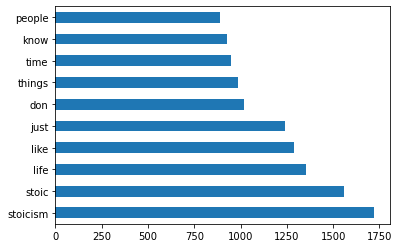

In [165]:
X_stoic_df = pd.DataFrame(X_stoic.todense(),
                         columns=cvec_s.get_feature_names())

# plotting top occuring words 
X_stoic_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

_Plotting top occcurring words in Zen subreddit_

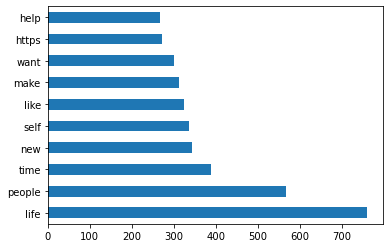

In [173]:
X_zen_df = pd.DataFrame(X_zen.todense(),
                         columns=cvec_z.get_feature_names())

# plotting top occuring words 
X_zen_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

Redefining training and testing sets

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [175]:
#baseline model
y_test.value_counts(normalize=True)

1    0.500253
0    0.499747
Name: label, dtype: float64

## Naïve Bayes


In [176]:
# cvec = CountVectorizer(ngram_range= (1,2))

_Checking out pipeline as a model_ 

In [182]:
# pipeline in two stage:
# 1. CountVectorizer - transformer; will do n_grams and stop words 
# 2. Multinomial naive bayes - estimator 

pipe = Pipeline([
    ('cvec' , CountVectorizer(stop_words='english', ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [183]:
cross_val_score(pipe, X_train, y_train, cv=3).mean()

0.8052808448994613

In [184]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('nb', MultinomialNB())])

In [2]:
# pipe = Pipeline([
#     ('sc', StandardScaler()),
#     ('cvec' , CountVectorizer(stop_words='english', ngram_range=(1,2))),
#     ('lr', LogisticRegression())
# ])

In [185]:
pipe.score(X_train, y_train)

0.9763446215139442

In [186]:
pipe.score(X_test, y_test)

0.8261748357756442

In [187]:
pipe.predict(X_test)

array([1, 1, 0, ..., 0, 1, 1])

## GridSearchCV

In [188]:
pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,2,), (1,2)]
}

In [189]:
gs = GridSearchCV(pipe,
                      pipe_params,
                      cv = 5,
                      verbose=1,
                      n_jobs=8)

In [190]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__ngram_range': [(1, 2), (1, 2)],
                         'cvec__stop_words': [None, 'english']},
             verbose=1)

In [191]:
gs.best_score_

0.888695687192927

In [192]:
gs.best_params_

{'cvec__max_features': 5000,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [194]:
gs.score(X_train, y_train)

0.9135956175298805

In [196]:
gs.score(X_test, y_test)

0.8989388580090955

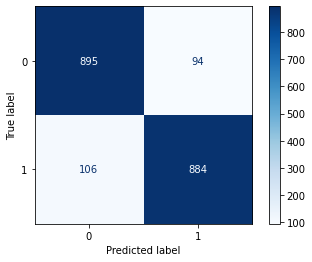

In [213]:
# predictions from grid search 
preds = gs.predict(X_test)
# confusion matrix 
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

plot_confusion_matrix(gs, X_test, y_test, cmap="Blues", values_format='d');

In [199]:
spec = tn / (tn + fp)
spec 

0.9049544994944388

## TfidfVectorizer

In [200]:
tvec = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))

In [201]:
# convert training data to dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

In [202]:
X_train_df.head()

,000,02,08,10,10 000,10 ways,100,101,11,12,...,youtube,youtube channel,youtube com,youtube videos,zen,zen meditation,zeno,zero,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.118537,0.0,0.132741,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


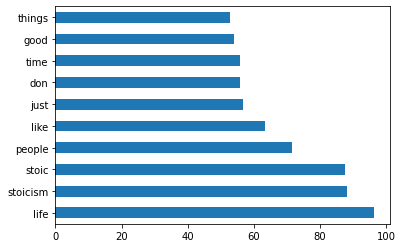

In [204]:
# plottin top occuring words

X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

_Going to build pipeline including Multinomial Naive Bayes, even though MNB asks us to have positive integers and Tf-idf does not yield positive integers._

In [205]:
# pipeline in two stages again 

tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [206]:
pipe_params_tvec = {
     'tvec__max_features':[2000, 3000, 4000, 5000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1),(1,2)]
}

In [207]:
# grid search instantiation 
gs_tvec = GridSearchCV(tvec_pipe,
                      pipe_params_tvec,
                      cv = 5,
                      verbose = 1,
                      n_jobs = 8)

In [208]:
# fitting on training data 
gs_tvec.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [209]:
gs_tvec.best_params_

{'tvec__max_features': 5000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [210]:
gs_tvec.best_score_

0.8864534736033407

In [211]:
gs_tvec.score(X_train, y_train)

0.9287848605577689

In [212]:
gs_tvec.score(X_test, y_test)

0.8918645780697322

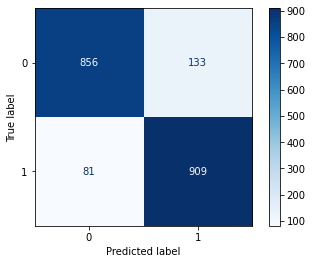

In [214]:
# predictions from grid search 
tvec_preds = gs_tvec.predict(X_test)

# confusion matrix 
tn, fp, fn, tp = confusion_matrix(y_test, tvec_preds).ravel()

plot_confusion_matrix(gs_tvec, X_test, y_test, cmap="Blues", values_format='d');